In [7]:
library(Seurat)
library(Signac)
library(Matrix)
library(ggplot2)

Attaching SeuratObject



In [1]:
gopa.peak.matrix <- Matrix::readMM(gzfile('/data/proj/GCB_MB/bcd_CT/single-cell/results/gopalan/peak_bc_matrix.mtx.gz'))
rnames           <- read.table(file = '/data/proj/GCB_MB/bcd_CT/single-cell/results/gopalan/peak_bc_matrix_rownames.txt')
cnames           <- read.table(file = '/data/proj/GCB_MB/bcd_CT/single-cell/results/gopalan/peak_bc_matrix_colnames.txt')
gopa.celltypes   <- read.table(file = '/data/proj/GCB_MB/bcd_CT/single-cell/results/gopalan/CellType_annotation.txt')


In [2]:
rownames(gopa.peak.matrix) <- rnames[,1]
colnames(gopa.peak.matrix) <- cnames[,1]
# tail(cnames[,1])
rownames(gopa.celltypes) <- gopa.celltypes[,1]
colnames(gopa.celltypes) <- c('barcode','celltype')

In [3]:
modality <- strsplit(rnames[,1],":")
modality <- lapply(modality,'[',3)

In [4]:
gopa.peak.matrix.ls <- lapply(unique(modality),function(x){
    modality.x <- modality == x 
    gopa.peak.matrix <- gopa.peak.matrix[modality.x,]
})
names(gopa.peak.matrix.ls) <- c("H3K27ac","H3K27me3")

In [5]:
gopa.summary.ls <- lapply(names(gopa.peak.matrix.ls),function(x){
    nms <- x
    x <- Matrix::colSums(gopa.peak.matrix.ls[[x]])
    x <- as.data.frame(x[which(names(x) %in% gopa.celltypes[,1])])
    colnames(x) <- 'fragments_count'
    x <- merge(x,gopa.celltypes)
    x$modality <- nms
    x
})

In [6]:
plot.gopa.df <- do.call('rbind',gopa.summary.ls)
head(plot.gopa.df)
ggplot(data=plot.gopa.df) + geom_violin(aes(x=celltype,y=fragments_count,fill=modality)) + scale_y_log10()


,fragments_count,barcode,celltype,modality
,<dbl>,<chr>,<chr>,<chr>
1,97,AAACGAAAGAAGACTT,ESC,H3K27ac
2,136,AAACGAAAGAAGACTT,ESC,H3K27ac
3,61,AAACGAAAGAAGACTT,ESC,H3K27ac
4,126,AAACGAAAGAAGACTT,ESC,H3K27ac
5,77,AAACGAAAGAAGACTT,ESC,H3K27ac
6,57,AAACGAAAGAAGACTT,ESC,H3K27ac


ERROR: Error in ggplot(data = plot.gopa.df): could not find function "ggplot"


In [8]:
seurat.nanoCT <- readRDS(file='/data/proj/GCB_MB/bcd_CT/single-cell/results/multiple_modalities/H3K27ac_H3K27me3/seurat_multimodal/peaks/Seurat_object.Rds')


In [9]:
nanoCT.df.ls <- lapply(names(seurat.nanoCT[1:2]), function(x){
    seurat.x <- seurat.nanoCT[[x]]
    data.frame('fragments_count' = 10^seurat.x$logUMI,
               'barcode' = seurat.x$barcode,
               'celltype' = seurat.x@active.ident,
               'modality' = x)
})


In [10]:
nanoCT.df <- do.call('rbind', nanoCT.df.ls)

In [11]:
plot.gopa.df$experiment <-'Gopalan et al.'
nanoCT.df$experiment <- 'This study'

median(plot.gopa.df$fragments_count)
median(nanoCT.df$fragments_count)

plot.merged.df <- rbind(plot.gopa.df, nanoCT.df)

[1] 246

[1] 5194

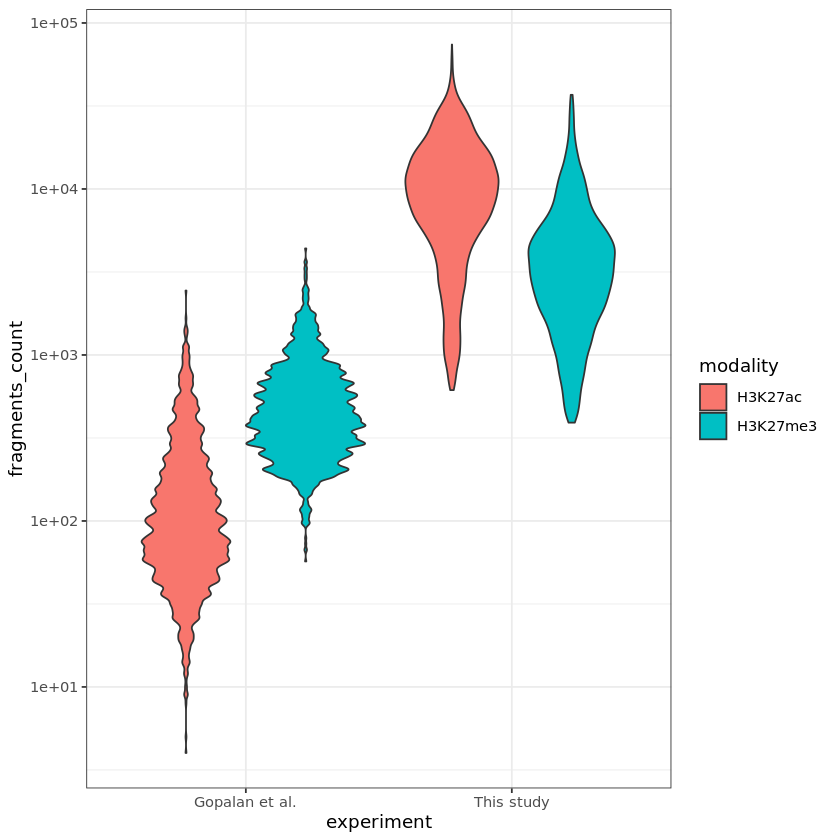

In [17]:
ggplot(data=plot.merged.df) + geom_violin(aes(x=experiment,y=fragments_count,fill = modality)) + scale_y_log10() + theme_bw()
ggsave('/data/proj/GCB_MB/bcd_CT/single-cell/results/figures/revision/fragments_violin_gopalan_comparison.pdf',width=5,height=3)

In [22]:
aggregate(plot.gopa.df$fragments_count,by=list(plot.gopa.df$modality),FUN=median)
aggregate(nanoCT.df$fragments_count, by = list(nanoCT.df$modality), FUN = median)

Group.1,x
<chr>,<dbl>
H3K27ac,95
H3K27me3,428


Group.1,x
<chr>,<dbl>
H3K27ac,9135.5
H3K27me3,3201.0
